In [1]:
import pandas as pd
import networkx as nx
import sqlite3
import matplotlib.pyplot as plt

In [2]:
# Connect to database
conn=sqlite3.connect(r'Data\database.db')

In [3]:
df = pd.read_sql_query('SELECT * from transactions where operation_type like "remittance_to_another_bank" ', conn)
df

,index,transaction_id,account_id,transaction_date,transaction_type,operation_type,transaction_amount,account_balance,k_symbol,partner_bank,target_account
0,233,695340,2378,1993-02-07 00:00:00,withdrawal,remittance_to_another_bank,9612.0,80033.7,household,EF,1222903.0
1,636,144776,485,1993-03-06 00:00:00,withdrawal,remittance_to_another_bank,1591.0,49952.9,unknown,WX,56978738.0
2,659,695341,2378,1993-03-07 00:00:00,withdrawal,remittance_to_another_bank,9612.0,47502.8,household,EF,1222903.0
3,665,144848,485,1993-03-07 00:00:00,withdrawal,remittance_to_another_bank,3572.0,46380.9,insurance_payment,AB,20747721.0
4,691,144704,485,1993-03-08 00:00:00,withdrawal,remittance_to_another_bank,7421.0,38959.9,household,EF,89687889.0
...,...,...,...,...,...,...,...,...,...,...,...
208278,1047130,2567360,8475,1998-12-14 00:00:00,withdrawal,remittance_to_another_bank,3833.0,38627.5,unknown,WX,90749495.0
208279,1047131,2592237,8564,1998-12-14 00:00:00,withdrawal,remittance_to_another_bank,7170.0,94170.1,household,UV,59670215.0
208280,1047135,492988,1681,1998-12-14 00:00:00,withdrawal,remittance_to_another_bank,8550.0,60559.8,household,UV,8172750.0
208281,1047136,489972,1672,1998-12-14 00:00:00,withdrawal,remittance_to_another_bank,3898.0,52169.8,household,ST,9213483.0


In [4]:
# extract year and month
df['year'] = pd.DatetimeIndex(df['transaction_date']).year
df['month'] = pd.DatetimeIndex(df['transaction_date']).month

# rename values
df = df.rename({'account_id': 'source_id',
                'partner_bank': 'target_id',
                'index': 'n_transactions'}, axis=1)

# group data
df = df.groupby(['source_id', 'year', 'month', 'operation_type']).agg({'transaction_amount': 'sum',
                                                                    'n_transactions': 'count',
                                                                    'account_balance': 'max'}).reset_index()

df

,source_id,year,month,operation_type,transaction_amount,n_transactions,account_balance
0,1,1995,9,remittance_to_another_bank,2452.0,1,19035.3
1,1,1995,10,remittance_to_another_bank,2452.0,1,19639.2
2,1,1995,11,remittance_to_another_bank,2452.0,1,18042.1
3,1,1995,12,remittance_to_another_bank,2452.0,1,16569.6
4,1,1996,1,remittance_to_another_bank,2452.0,1,15511.0
...,...,...,...,...,...,...,...
125596,11362,1998,8,remittance_to_another_bank,10687.0,5,46683.5
125597,11362,1998,9,remittance_to_another_bank,10687.0,5,44181.8
125598,11362,1998,10,remittance_to_another_bank,10687.0,5,42059.9
125599,11362,1998,11,remittance_to_another_bank,10687.0,5,41866.7


## Transactions

In [5]:
df_outflow = pd.read_sql_query('SELECT * from transactions where operation_type like "remittance_to_another_bank" ', conn)

# rename values
df_outflow = df_outflow.rename({'account_id': 'source_id',
                                'partner_bank': 'target_id',
                                'index': 'n_transactions',
                                'transaction_date': 'last_date'}, axis=1)

# group data
df_outflow = df_outflow.groupby(['source_id', 'target_id']).agg({'transaction_amount': 'sum',
                                                                 'n_transactions': 'count',
                                                                'last_date': 'max'}).reset_index()


df_outflow

,source_id,target_id,transaction_amount,n_transactions,last_date
0,1,YZ,98080.0,40,1998-12-05 00:00:00
1,2,QR,472290.0,65,1998-12-05 00:00:00
2,2,ST,80944.8,24,1995-12-12 00:00:00
3,3,AB,46007.0,13,1998-12-09 00:00:00
4,3,CD,4251.0,13,1998-12-07 00:00:00
...,...,...,...,...,...
5786,11359,OP,207828.0,46,1998-12-06 00:00:00
5787,11362,KL,4386.0,34,1998-12-06 00:00:00
5788,11362,MN,131312.0,58,1998-12-12 00:00:00
5789,11362,ST,11220.0,34,1998-12-07 00:00:00


In [6]:
df_inflow = pd.read_sql_query('SELECT * from transactions where operation_type like "collection_from_another_bank" ', conn)

# rename values
df_inflow = df_inflow.rename({'partner_bank': 'source_id',
                              'account_id': 'target_id',
                              'index': 'n_transactions',
                              'transaction_date': 'last_date'}, axis=1)

# group data
df_inflow = df_inflow.groupby(['source_id', 'target_id']).agg({'transaction_amount': 'sum',
                                                               'n_transactions': 'count',
                                                               'last_date': 'max'}).reset_index()

df_inflow

,source_id,target_id,transaction_amount,n_transactions,last_date
0,AB,1,165555.0,45,1998-12-13 00:00:00
1,AB,63,125600.0,25,1998-12-12 00:00:00
2,AB,80,131742.0,39,1998-12-14 00:00:00
3,AB,123,334167.0,69,1998-12-05 00:00:00
4,AB,143,123100.0,25,1998-12-08 00:00:00
...,...,...,...,...,...
1601,YZ,8158,1292980.0,30,1998-12-14 00:00:00
1602,YZ,9493,1155669.0,45,1998-12-10 00:00:00
1603,YZ,9833,3441528.0,65,1998-12-08 00:00:00
1604,YZ,10915,365882.0,22,1998-12-12 00:00:00


In [7]:
df = df_outflow.append(df_inflow) 
df

,source_id,target_id,transaction_amount,n_transactions,last_date
0,1,YZ,98080.0,40,1998-12-05 00:00:00
1,2,QR,472290.0,65,1998-12-05 00:00:00
2,2,ST,80944.8,24,1995-12-12 00:00:00
3,3,AB,46007.0,13,1998-12-09 00:00:00
4,3,CD,4251.0,13,1998-12-07 00:00:00
...,...,...,...,...,...
1601,YZ,8158,1292980.0,30,1998-12-14 00:00:00
1602,YZ,9493,1155669.0,45,1998-12-10 00:00:00
1603,YZ,9833,3441528.0,65,1998-12-08 00:00:00
1604,YZ,10915,365882.0,22,1998-12-12 00:00:00


## Network

In [8]:
G=nx.from_pandas_edgelist(df_outflow, "source_id", "target_id", create_using=nx.Graph())
print("Number of nodes: ", len(G.nodes()))
print("Number of edges: ", len(G.edges()))

Number of nodes:  3615
Number of edges:  5791


In [9]:
pos = nx.kamada_kawai_layout(G)

In [10]:
node_list = pd.read_sql_query('SELECT distinct partner_bank from transactions where partner_bank not like "none"', conn)

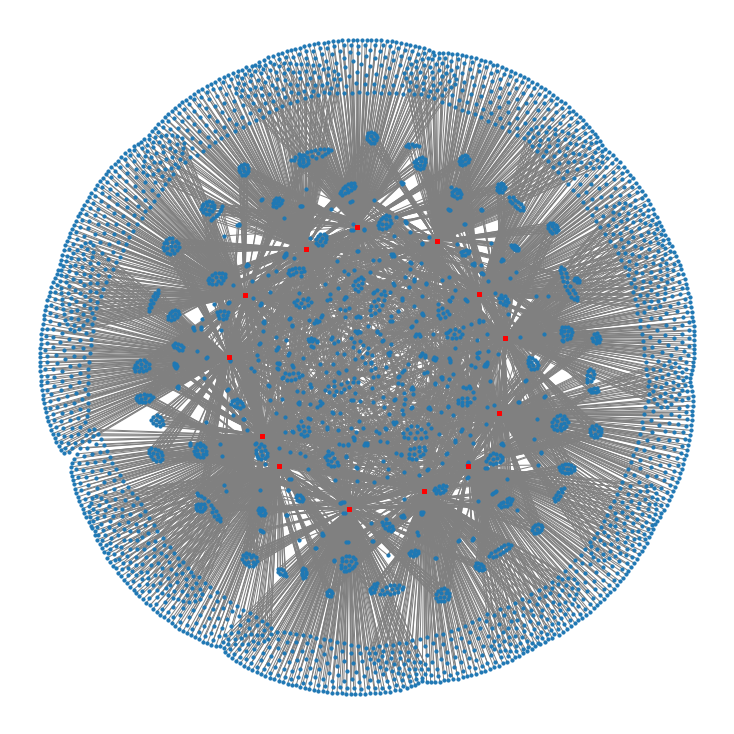

In [11]:
plt.figure(figsize=(10,10))
nx.draw(G, pos=pos, node_size = 10, edge_color='grey')
nx.draw_networkx_nodes(G,pos=pos, 
                       nodelist=list(node_list.partner_bank),
                       node_size = 20,node_color='r', node_shape= 's' ) 
plt.show()